Image Manipulation

In [1]:
#downloading and unzipping data
!wget https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0321EN/data/concrete_data_week2.zip

--2020-04-12 18:40:55--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0321EN/data/concrete_data_week2.zip
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 260502910 (248M) [application/zip]
Saving to: ‘concrete_data_week2.zip’

concrete_data_week2 100%[===================>] 248.43M  28.8MB/s    in 8.0s    

2020-04-12 18:41:04 (31.0 MB/s) - ‘concrete_data_week2.zip’ saved [260502910/260502910]



In [2]:
!unzip concrete_data_week2.zip

Streaming output truncated to the last 5000 lines.
  inflating: concrete_data_week2/Negative/15530.jpg  
  inflating: __MACOSX/concrete_data_week2/Negative/._15530.jpg  
  inflating: concrete_data_week2/Negative/03352.jpg  
  inflating: __MACOSX/concrete_data_week2/Negative/._03352.jpg  
  inflating: concrete_data_week2/Negative/13141.jpg  
  inflating: __MACOSX/concrete_data_week2/Negative/._13141.jpg  
  inflating: concrete_data_week2/Negative/10448.jpg  
  inflating: __MACOSX/concrete_data_week2/Negative/._10448.jpg  
  inflating: concrete_data_week2/Negative/08207.jpg  
  inflating: __MACOSX/concrete_data_week2/Negative/._08207.jpg  
  inflating: concrete_data_week2/Negative/07134.jpg  
  inflating: __MACOSX/concrete_data_week2/Negative/._07134.jpg  
  inflating: concrete_data_week2/Negative/18014.jpg  
  inflating: __MACOSX/concrete_data_week2/Negative/._18014.jpg  
  inflating: concrete_data_week2/Negative/17327.jpg  
  inflating: __MACOSX/concrete_data_week2/Negative/._17327.jpg

In [3]:
#importing libraries and packages
import os
import numpy as np
import matplotlib.pyplot as plt

import keras
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [4]:
#content of the unzipped data
!ls ./concrete_data_week2

Negative  Positive


In [5]:
os.listdir('concrete_data_week2')

['.DS_Store', 'Positive', 'Negative']

In [0]:
#path to the folder containing the data
dataset_dir = './concrete_data_week2'

In [0]:
#keras ImageDataGenerator requires images be arranged in a way that the main directory would contain folders equal to the number of classes the problem
#in the main directory concrete_data_week2 all negative images(no crack) are in the Negative folder and positive images(images with crack) are in the Positive folder
#creating ImageDataGenerator instance
data_generator = ImageDataGenerator()

In [9]:
#flow_from_directory methods to loops through the images in batches
image_generator = data_generator.flow_from_directory(
    dataset_dir,
    batch_size=4,
    class_mode='categorical',
    seed=24
    )

Found 40000 images belonging to 2 classes.


In [10]:
#accessing the batches
first_batch = image_generator.next()
first_batch
#returnes the images along with their labels

(array([[[[151., 149., 150.],
          [153., 151., 152.],
          [155., 153., 154.],
          ...,
          [153., 149., 148.],
          [153., 149., 148.],
          [153., 149., 148.]],
 
         [[152., 150., 151.],
          [154., 152., 153.],
          [156., 154., 155.],
          ...,
          [154., 150., 149.],
          [154., 150., 149.],
          [154., 150., 149.]],
 
         [[153., 151., 152.],
          [155., 153., 154.],
          [156., 154., 155.],
          ...,
          [156., 152., 151.],
          [156., 152., 151.],
          [156., 152., 151.]],
 
         ...,
 
         [[142., 140., 143.],
          [142., 140., 143.],
          [142., 140., 143.],
          ...,
          [139., 135., 136.],
          [142., 138., 139.],
          [145., 141., 142.]],
 
         [[142., 140., 143.],
          [142., 140., 143.],
          [142., 140., 143.],
          ...,
          [140., 136., 137.],
          [142., 138., 139.],
          [146., 142., 143.

In [11]:
#only images of the batch
first_batch_images = image_generator.next()[0]
first_batch_images

array([[[[172., 174., 169.],
         [176., 178., 173.],
         [181., 183., 178.],
         ...,
         [157., 159., 154.],
         [156., 158., 153.],
         [154., 156., 151.]],

        [[170., 172., 167.],
         [172., 174., 169.],
         [174., 176., 171.],
         ...,
         [155., 157., 152.],
         [154., 156., 151.],
         [153., 155., 150.]],

        [[169., 171., 166.],
         [167., 169., 164.],
         [166., 168., 163.],
         ...,
         [152., 154., 149.],
         [152., 154., 149.],
         [151., 153., 148.]],

        ...,

        [[153., 154., 148.],
         [155., 156., 150.],
         [158., 159., 153.],
         ...,
         [143., 144., 138.],
         [144., 145., 139.],
         [145., 146., 140.]],

        [[147., 148., 142.],
         [150., 151., 145.],
         [153., 154., 148.],
         ...,
         [142., 143., 137.],
         [143., 144., 138.],
         [144., 145., 139.]],

        [[141., 142., 136.],
       

and the following returns the labels only.

In [13]:
#only labels of the batch
first_batch_labels = image_generator.next()[1]
first_batch_labels

array([[1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [0]:
#normalazing the images
data_generator = ImageDataGenerator(
    rescale=1./255
)

In [15]:
image_generator = data_generator.flow_from_directory(
    dataset_dir,
    batch_size=4,
    class_mode='categorical',
    seed=24
    )

Found 40000 images belonging to 2 classes.


In [16]:
first_batch = image_generator.next()
first_batch

(array([[[[0.5921569 , 0.58431375, 0.5882353 ],
          [0.6       , 0.5921569 , 0.59607846],
          [0.60784316, 0.6       , 0.6039216 ],
          ...,
          [0.6       , 0.58431375, 0.5803922 ],
          [0.6       , 0.58431375, 0.5803922 ],
          [0.6       , 0.58431375, 0.5803922 ]],
 
         [[0.59607846, 0.5882353 , 0.5921569 ],
          [0.6039216 , 0.59607846, 0.6       ],
          [0.6117647 , 0.6039216 , 0.60784316],
          ...,
          [0.6039216 , 0.5882353 , 0.58431375],
          [0.6039216 , 0.5882353 , 0.58431375],
          [0.6039216 , 0.5882353 , 0.58431375]],
 
         [[0.6       , 0.5921569 , 0.59607846],
          [0.60784316, 0.6       , 0.6039216 ],
          [0.6117647 , 0.6039216 , 0.60784316],
          ...,
          [0.6117647 , 0.59607846, 0.5921569 ],
          [0.6117647 , 0.59607846, 0.5921569 ],
          [0.6117647 , 0.59607846, 0.5921569 ]],
 
         ...,
 
         [[0.5568628 , 0.54901963, 0.56078434],
          [0.55686

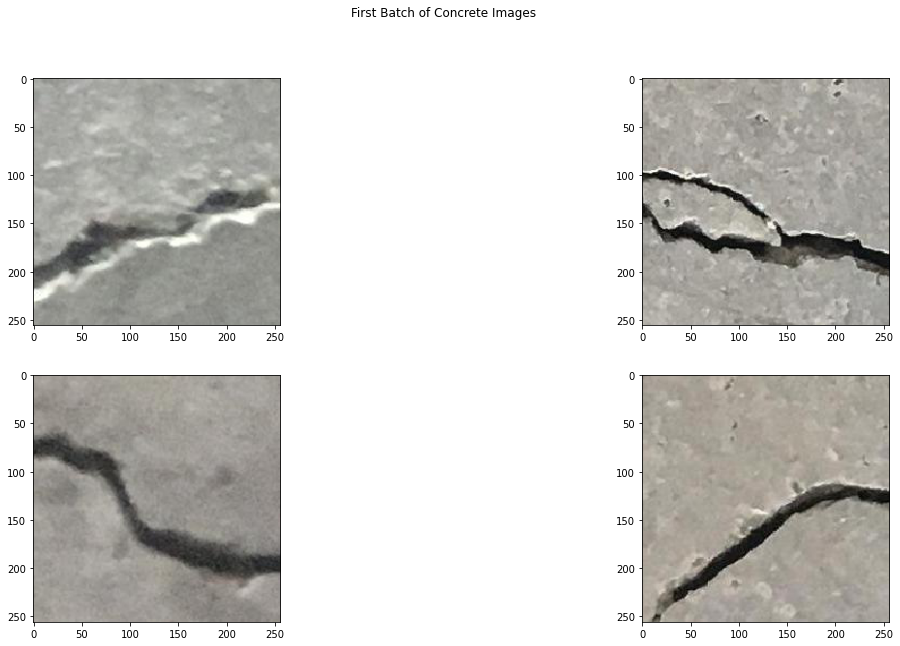

In [17]:
#visualizing images of the batch
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20, 10)) # define your figure and axes

ind = 0
for ax1 in axs:
    for ax2 in ax1: 
        image_data = first_batch_images[ind].astype(np.uint8)
        ax2.imshow(image_data)
        ind += 1

fig.suptitle('First Batch of Concrete Images') 
plt.show()

Found 40000 images belonging to 2 classes.


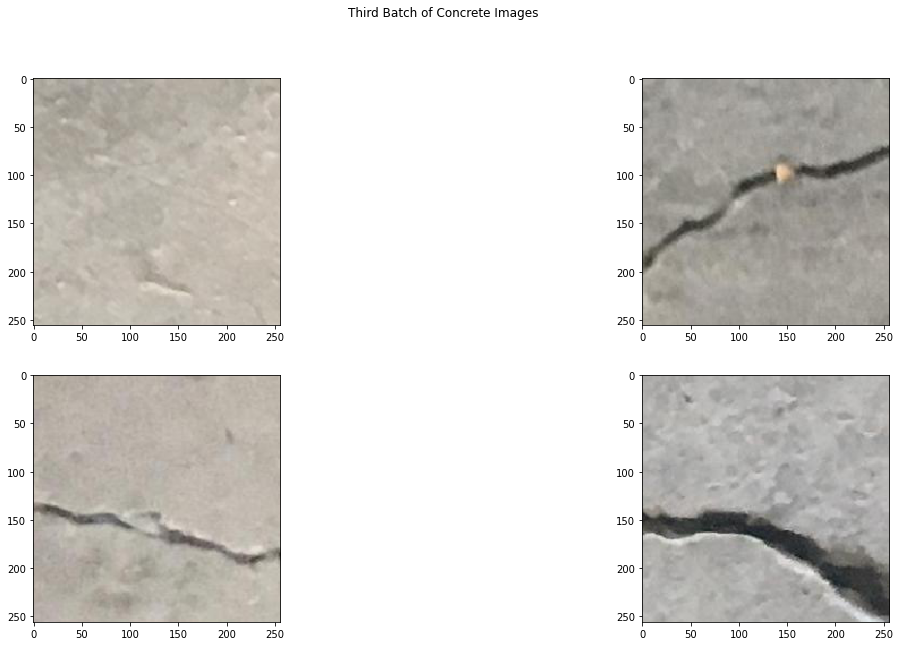

In [18]:
#visualizing images in the third batch
data_generators = ImageDataGenerator(
    rescale=1./255
)
image_generators = data_generators.flow_from_directory(
    dataset_dir,
    batch_size=4,
    class_mode='categorical',
    seed=24
    )

first_batch_images = image_generators.next()
second_batch_images = image_generators.next()
third_batch_images = image_generators.next()
fourth_batch_images = image_generators.next()
fifth_batch_images = image_generators.next()

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20, 10)) # define your figure and axes

ind = 0
for ax1 in axs:
    for ax2 in ax1: 
        image_data = third_batch_images[0][ind]
        ax2.imshow(image_data)
        ind += 1

fig.suptitle('Third Batch of Concrete Images') 
plt.show()

In [19]:
fourth_batch_images[1]

array([[1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

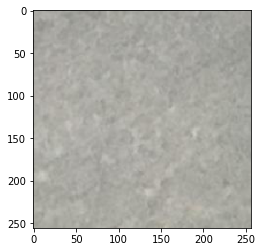

In [20]:
#plot to visualize the second image in the fifth batch
plt.imshow(fifth_batch_images[0][1])



### Question: How many images from each class are in the fifth batch?

In [21]:
fifth_batch_images[1]

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.]], dtype=float32)